<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.628619,50.368808,35.620727,-52.299683,92.318470,143.257812,-50.939342
1,0.0,1.0,39.403659,38.570092,52.632585,13.825830,154.432167,156.127965,-1.695798
2,0.0,2.0,20.545233,52.121231,96.187806,-12.222796,166.631473,205.946974,-39.315501
3,0.0,3.0,26.245670,39.069777,77.857953,19.866332,173.039733,180.557336,-7.517603
4,0.0,4.0,83.007043,60.502554,70.778618,38.588590,262.876805,238.193607,24.683199
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.812037,56.704692,64.126209,-52.485367,146.157571,197.069324,-50.911752
19996,999.0,16.0,44.482361,74.099820,32.390375,86.550471,247.523026,191.627622,55.895404
19997,999.0,17.0,43.805796,45.722330,53.720489,-34.295337,118.953278,165.680754,-46.727476
19998,999.0,18.0,55.464083,25.546104,78.463833,10.299903,179.773923,158.161528,21.612395


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    48.628619  50.368808  35.620727 -52.299683   92.318470   
      1.0    39.403659  38.570092  52.632585  13.825830  154.432167   
      2.0    20.545233  52.121231  96.187806 -12.222796  166.631473   
      3.0    26.245670  39.069777  77.857953  19.866332  173.039733   
      4.0    83.007043  60.502554  70.778618  38.588590  262.876805   
...                ...        ...        ...        ...         ...   
999.0 15.0   67.812037  56.704692  64.126209 -52.485367  146.157571   
      16.0   44.482361  74.099820  32.390375  86.550471  247.523026   
      17.0   43.805796  45.722330  53.720489 -34.295337  118.953278   
      18.0   55.464083  25.546104  78.463833  10.299903  179.773923   
      19.0   40.594546  69.321669  63.754034  47.210400  230.880648   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    143.257812 -50.939342  
      1.0    156.127965  -1.695798  
      2.0    205.946974 -39.315501  
      3.0    180.557336  -7.517603  
      4.0    238.193607  24.683199  
...                 ...        ...  
999.0 15.0   197.069324 -50.911752  
      16.0   191.627622  55.895404  
      17.0   165.680754 -46.727476  
      18.0   158.161528  21.612395  
      19.0   196.373527  34.507122  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    48.628619  50.368808  35.620727 -52.299683   92.318470   
      1.0    39.403659  38.570092  52.632585  13.825830  154.432167   
      2.0    20.545233  52.121231  96.187806 -12.222796  166.631473   
      3.0    26.245670  39.069777  77.857953  19.866332  173.039733   
      4.0    83.007043  60.502554  70.778618  38.588590  262.876805   
...                ...        ...        ...        ...         ...   
999.0 15.0   67.812037  56.704692  64.126209 -52.485367  146.157571   
      16.0   44.482361  74.099820  32.390375  86.550471  247.523026   
      17.0   43.805796  45.722330  53.720489 -34.295337  118.953278   
      18.0   55.464083  25.546104  78.463833  10.299903  179.773923   
      19.0   40.594546  69.321669  63.754034  47.210400  230.880648   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    143.257812 -50.939342  
      1.0    156.127965  -1.695798  
      2.0    205.946974 -39.315501  
      3.0    180.557336  -7.517603  
      4.0    238.193607  24.683199  
...                 ...        ...  
999.0 15.0   197.069324 -50.911752  
      16.0   191.627622  55.895404  
      17.0   165.680754 -46.727476  
      18.0   158.161528  21.612395  
      19.0   196.373527  34.507122  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.628619,50.368808,35.620727,-52.299683,92.318470,143.257812,-50.939342
1,0.0,1.0,39.403659,38.570092,52.632585,13.825830,154.432167,156.127965,-1.695798
2,0.0,2.0,20.545233,52.121231,96.187806,-12.222796,166.631473,205.946974,-39.315501
3,0.0,3.0,26.245670,39.069777,77.857953,19.866332,173.039733,180.557336,-7.517603
4,0.0,4.0,83.007043,60.502554,70.778618,38.588590,262.876805,238.193607,24.683199
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.812037,56.704692,64.126209,-52.485367,146.157571,197.069324,-50.911752
19996,999.0,16.0,44.482361,74.099820,32.390375,86.550471,247.523026,191.627622,55.895404
19997,999.0,17.0,43.805796,45.722330,53.720489,-34.295337,118.953278,165.680754,-46.727476
19998,999.0,18.0,55.464083,25.546104,78.463833,10.299903,179.773923,158.161528,21.612395


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    48.628619  50.368808  35.620727 -52.299683   92.318470   
      1.0    39.403659  38.570092  52.632585  13.825830  154.432167   
      2.0    20.545233  52.121231  96.187806 -12.222796  166.631473   
      3.0    26.245670  39.069777  77.857953  19.866332  173.039733   
      4.0    83.007043  60.502554  70.778618  38.588590  262.876805   
...                ...        ...        ...        ...         ...   
999.0 15.0   67.812037  56.704692  64.126209 -52.485367  146.157571   
      16.0   44.482361  74.099820  32.390375  86.550471  247.523026   
      17.0   43.805796  45.722330  53.720489 -34.295337  118.953278   
      18.0   55.464083  25.546104  78.463833  10.299903  179.773923   
      19.0   40.594546  69.321669  63.754034  47.210400  230.880648   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    143.257812 -50.939342  
      1.0    156.127965  -1.695798  
      2.0    205.946974 -39.315501  
      3.0    180.557336  -7.517603  
      4.0    238.193607  24.683199  
...                 ...        ...  
999.0 15.0   197.069324 -50.911752  
      16.0   191.627622  55.895404  
      17.0   165.680754 -46.727476  
      18.0   158.161528  21.612395  
      19.0   196.373527  34.507122  

[20000 rows x 7 columns]

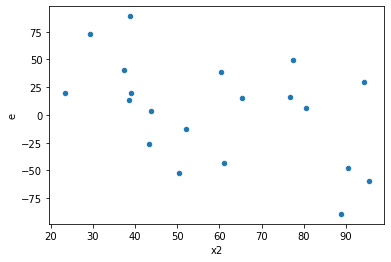

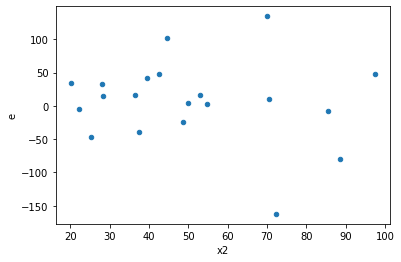

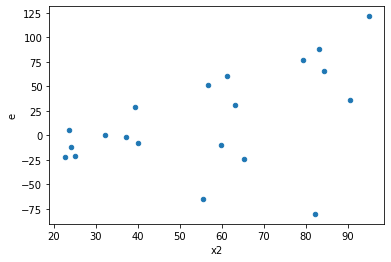

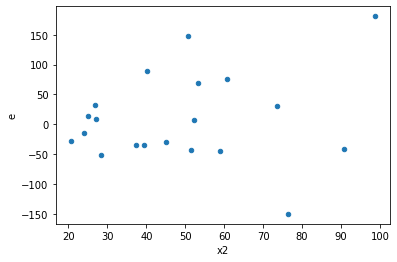

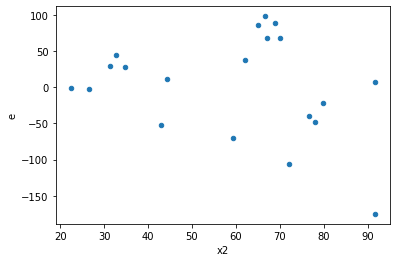

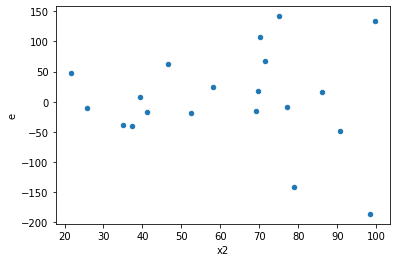

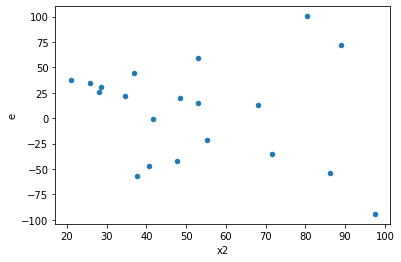

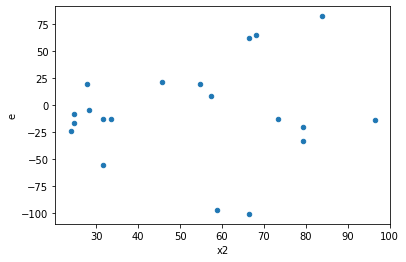

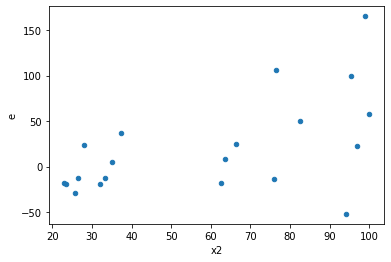

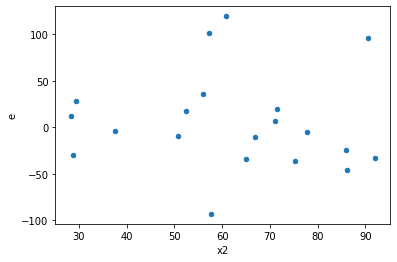

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,14966.579163704348,19614.33176751899,2138.0827376720495,2802.0473953598557,1.3105420786525468,0.7302861572969928,0.6348569213515036,0.3651430786484964,Reject001=1 : Homoscedasticity
2.0,9.0,5.0,6016.954266870614,19968.683394683885,668.5504740967349,3993.736678936777,5.973724997103075,0.06327042805012129,0.9683647859749394,0.03163521402506064,Reject001=1 : Homoscedasticity
3.0,11.0,3.0,26376.36479056704,55518.27760135062,2397.851344597004,18506.09253378354,7.71778141104647,0.11897297946959418,0.9405135102652029,0.05948648973479709,Reject001=1 : Homoscedasticity
6.0,9.0,5.0,12215.96006831234,14221.741381478238,1357.328896479149,2844.3482762956473,2.09554831085801,0.4297647005696432,0.7851176497151784,0.2148823502848216,Reject001=1 : Homoscedasticity
7.0,6.0,8.0,1829.4346976403683,20482.967283398553,304.9057829400614,2560.370910424819,8.397252704544927,0.008389676616360697,0.9958051616918197,0.004194838308180349,Reject001=0 : Heteroscedasticity
9.0,5.0,9.0,1348.2526060072644,48141.031947145915,269.6505212014529,5349.00354968288,19.836800336412846,0.0002572376861982306,0.9998713811569009,0.0001286188430991153,Reject001=0 : Heteroscedasticity
12.0,8.0,6.0,9433.45351753943,41627.85538623487,1179.1816896924288,6937.975897705812,5.883720853497543,0.044389350708007314,0.9778053246459963,0.022194675354003657,Reject001=1 : Homoscedasticity
15.0,5.0,9.0,16554.15273577905,66454.00321085421,3310.83054715581,7383.778134539356,2.230189080767796,0.2793620578928304,0.8603189710535848,0.1396810289464152,Reject001=1 : Homoscedasticity
16.0,10.0,4.0,15344.227401020862,38860.874021344236,1534.4227401020862,9715.218505336059,6.331513637949408,0.09023079670922773,0.9548846016453861,0.04511539835461387,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,3.0,18532.09369951539,3762.3388414830933,1684.7357908650354,1254.1129471610311,0.7443974028218995,0.6210291663313732,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,14966.579163704348,19614.33176751899,2138.0827376720495,2802.0473953598557,1.3105420786525468,0.7302861572969928,Reject001=1 : Homoscedasticity
2.0,9.0,5.0,6016.954266870614,19968.683394683885,668.5504740967349,3993.736678936777,5.973724997103075,0.06327042805012129,Reject001=1 : Homoscedasticity
3.0,11.0,3.0,26376.36479056704,55518.27760135062,2397.851344597004,18506.09253378354,7.71778141104647,0.11897297946959418,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,46189.24502127817,23508.519950335634,6598.46357446831,3358.3599929050906,0.5089609050657978,0.3928179732684466,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,82391.22188508748,16182.399023881488,11770.174555012496,2311.7712891259266,0.19640926124935215,0.047558047273474666,Reject001=1 : Homoscedasticity
6.0,9.0,5.0,12215.96006831234,14221.741381478238,1357.328896479149,2844.3482762956473,2.09554831085801,0.4297647005696432,Reject001=1 : Homoscedasticity
7.0,6.0,8.0,1829.4346976403683,20482.967283398553,304.9057829400614,2560.370910424819,8.397252704544927,0.008389676616360697,Reject001=0 : Heteroscedasticity
8.0,11.0,3.0,24175.054326261943,378.2059727632917,2197.7322114783583,126.0686575877639,0.05736306585912973,0.000344365988612318,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      826
Reject001=0 : Heteroscedasticity    174
Name: Result_test, dtype: int64